# Fashion MINST Classification with shadow ANN
The notebook build shadow ANN to classify the images of Fashion MNIST into 10 classes

## *Question: How does the shadow ANN model perform on classifying the images of fashion ? Which category does this model make more mistakes?*

### **Result:**
#### ***sparse_categorical_crossentropy***
Test accuracy: 0.8970714211463928

#### ***categorical_crossentropy***
Test accuracy: 0.8812857270240784

There is no significant misclassification between two categories. ANN model performs relatively not well on classifying shirt.

### load data and reshape the data

In [0]:
# import library
import tensorflow.keras as keras
import sys
sys.modules['keras'] = keras
from keras.models import Sequential
from keras.layers import Dense # define a layer
from keras.optimizers import SGD # this is a mini batch method
from keras.datasets import mnist
import matplotlib.pyplot as plt
from IPython import display
import numpy as np
from sklearn.datasets import fetch_openml

In [0]:
# load the data
fasion_mnist=fetch_openml(name="Fashion-MNIST")

In [0]:
data=fasion_mnist.data
images=data.reshape(-1,28,28)
target=fasion_mnist.target.astype('int64')

In [0]:
#a row in data is an image (28x28 reshaped into a vector of 784 elements)
data.shape

(70000, 784)

In [0]:
# images[0] is the first image (28x28)
images.shape

(70000, 28, 28)

In [0]:
images[0].shape

(28, 28)

In [0]:
images[0].max()

255.0

### Normalize the data

In [0]:
#normalize the value of every pixel into the range of 0 to 1
data = data.astype('float32')
data /= 255

In [0]:
#an element in target is the class label of the corresponding image in data
target.shape

(70000,)

In [0]:
[target.min(), target.max()]

[0, 9]

### Show images of dataset

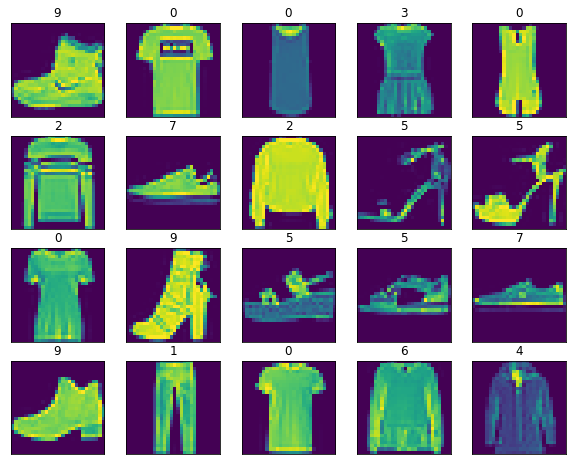

In [0]:
plt.figure(figsize=(10,10))
for i in range(0,20):
    plt.subplot(5,5, i+1)
    plt.imshow(images[i])
    plt.title(target[i])
    plt.xticks([])
    plt.yticks([])

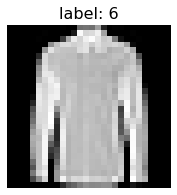

<Figure size 432x288 with 0 Axes>

In [0]:
# show some of the images
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display
fig, ax = plt.subplots(figsize=(3, 3))
for n in range(0, target.shape[0], 1000):
    x=data[n,:]
    x=x.reshape(28,28) # reshape a vector to an image
    ax.imshow(x, cmap='gray')    
    ax.axis('off')
    ax.set_title('label: ' + str(int(target[n])), fontsize=16)
    plt.draw()
    display.clear_output(wait=True)
    display.display(fig)
    plt.pause(0.1)  

### create the training, testing and validating dataset

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=0)

In [0]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=0)

In [0]:
print('train:', x_train.shape, y_train.shape)
print('validation:', x_val.shape, y_val.shape)
print('test:', x_test.shape, y_test.shape)

train: (50400, 784) (50400,)
validation: (5600, 784) (5600,)
test: (14000, 784) (14000,)


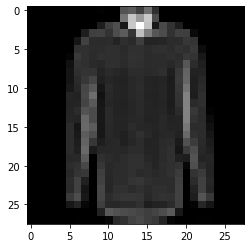

In [0]:
#the first image in the training set
plt.imshow(x_train[0].reshape(28,28), cmap='gray')

In [0]:
#the class label of the first training sample
y_train[0]

6

### when loss =  sparse categorical crossentropy

#### Define the ANN model


In [0]:
model = Sequential()
model.add(Dense(units=256, activation='relu', input_shape=(784,)))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer=SGD(lr=0.01, momentum=0.9), 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [0]:
loss_train_list=[]
loss_val_list=[]
acc_train_list=[]
acc_val_list=[]

#### Train the model

In [0]:
for epoch in range(0, 20):   
    print('epoch', epoch)
    #set epochs=1
    history=model.fit(x_train, y_train, batch_size=64, epochs=1, validation_data=(x_val, y_val))
    loss_train_list.extend(history.history['loss'])
    loss_val_list.extend(history.history['val_loss'])
    acc_train_list.extend(history.history['accuracy'])
    acc_val_list.extend(history.history['val_accuracy'])
    #save the model to a a HDF5 file 
    model.save('NN_multiclass_classification_Keras_sCE_e'+str(epoch)+'.h5')

epoch 0
788/788 [==============================] - 2s 2ms/step - loss: 0.5830 - accuracy: 0.7951 - val_loss: 0.4472 - val_accuracy: 0.8355
epoch 1
788/788 [==============================] - 2s 2ms/step - loss: 0.4084 - accuracy: 0.8522 - val_loss: 0.4320 - val_accuracy: 0.8482
epoch 2
788/788 [==============================] - 2s 2ms/step - loss: 0.3681 - accuracy: 0.8661 - val_loss: 0.3719 - val_accuracy: 0.8598
epoch 3
788/788 [==============================] - 2s 2ms/step - loss: 0.3343 - accuracy: 0.8782 - val_loss: 0.3514 - val_accuracy: 0.8680
epoch 4
788/788 [==============================] - 2s 2ms/step - loss: 0.3214 - accuracy: 0.8816 - val_loss: 0.3304 - val_accuracy: 0.8793
epoch 5
788/788 [==============================] - 2s 2ms/step - loss: 0.3050 - accuracy: 0.8876 - val_loss: 0.3225 - val_accuracy: 0.8766
epoch 6
788/788 [==============================] - 2s 2ms/step - loss: 0.2929 - accuracy: 0.8928 - val_loss: 0.3322 - val_accuracy: 0.8795
epoch 7
788/788 [==========

#### Plot training loss vs epoch and validation loss vs epoch

In [0]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

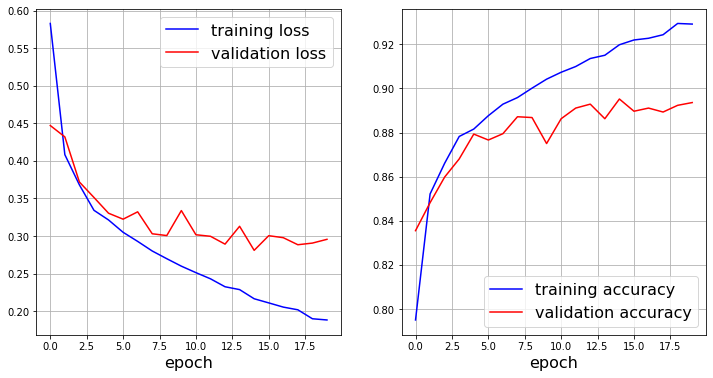

In [0]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].plot(np.arange(0,len(loss_train_list)), loss_train_list, '-b', label='training loss')
ax[0].plot(np.arange(0,len(loss_val_list)), loss_val_list, '-r', label='validation loss')
ax[0].set_xlabel('epoch',fontsize=16)
ax[0].legend(fontsize=16)
ax[0].grid(True)
ax[1].plot(np.arange(0,len(acc_train_list)), acc_train_list, '-b', label='training accuracy')
ax[1].plot(np.arange(0,len(acc_val_list)), acc_val_list, '-r', label='validation accuracy')
ax[1].set_xlabel('epoch',fontsize=16)
ax[1].legend(fontsize=16)
ax[1].grid(True)

#### load the best model

In [0]:
from keras.models import load_model
model = load_model('NN_multiclass_classification_Keras_sCE_e14.h5')

In [0]:
score = model.evaluate(x_test, y_test, batch_size=64, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2987405061721802
Test accuracy: 0.8952142596244812


In [0]:
y_test_pred=model.predict(x_test, batch_size=64)

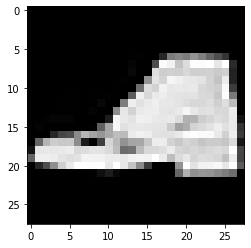

In [0]:
#the first image in the test set
plt.imshow(x_test[0].reshape(28,28), cmap='gray')

In [0]:
y_test_pred[0]

array([5.4929075e-09, 2.9066083e-09, 1.2068359e-10, 5.5985695e-11,
       3.4158672e-11, 4.9521125e-09, 5.6479843e-10, 3.1681600e-04,
       2.5645934e-09, 9.9968314e-01], dtype=float32)

In [0]:
np.argmax(y_test_pred[0])

9

In [0]:
y_test[0]

9

### when loss = Categorical_crossentropy


#### One hot encoding to dataset

In [0]:
# apply one-hot encoding to the training, validation, and test set
y_train = keras.utils.to_categorical(y_train, 10)
y_val = keras.utils.to_categorical(y_val, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [0]:
# to use categorical_crossentropy loss in Keras !!!!!
# we convert every class label into a one-hot vector of 10 elements (there are 10 classes)
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

#### Define the MLP model

In [0]:
model = Sequential()
model.add(Dense(units=256, activation='relu', input_shape=(784,)))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=10, activation='softmax')) # because there are 10 classes
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01), metrics=['accuracy']) # assemble those layers together
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


#### Train the model 

In [0]:
history=model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_val, y_val))
# set an epochs and see the curves and adjust it

Epoch 1/100
788/788 [==============================] - 2s 3ms/step - loss: 0.9289 - accuracy: 0.7048 - val_loss: 0.6250 - val_accuracy: 0.8011
Epoch 2/100
788/788 [==============================] - 2s 3ms/step - loss: 0.5718 - accuracy: 0.8076 - val_loss: 0.5344 - val_accuracy: 0.8139
Epoch 3/100
788/788 [==============================] - 2s 2ms/step - loss: 0.5052 - accuracy: 0.8262 - val_loss: 0.4936 - val_accuracy: 0.8243
Epoch 4/100
788/788 [==============================] - 2s 3ms/step - loss: 0.4738 - accuracy: 0.8359 - val_loss: 0.4716 - val_accuracy: 0.8366
Epoch 5/100
788/788 [==============================] - 2s 3ms/step - loss: 0.4516 - accuracy: 0.8431 - val_loss: 0.4499 - val_accuracy: 0.8414
Epoch 6/100
788/788 [==============================] - 2s 2ms/step - loss: 0.4361 - accuracy: 0.8475 - val_loss: 0.4532 - val_accuracy: 0.8368
Epoch 7/100
788/788 [==============================] - 2s 2ms/step - loss: 0.4229 - accuracy: 0.8528 - val_loss: 0.4301 - val_accuracy: 0.8405

#### Plot training histroy: loss vs epoch and accuracy vs epoch

In [0]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

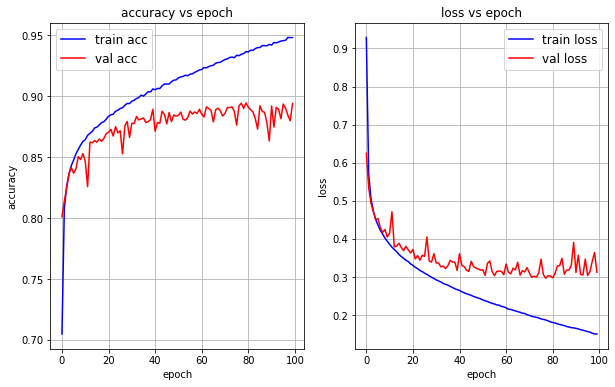

In [0]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].plot(history.history['accuracy'], '-b', label='train acc')
ax[0].plot(history.history['val_accuracy'], '-r', label='val acc')
ax[0].set_title('accuracy vs epoch')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('accuracy')
ax[0].legend(fontsize=12)
ax[0].grid(True)
ax[1].plot(history.history['loss'], '-b', label='train loss')
ax[1].plot(history.history['val_loss'], '-r', label='val loss')
ax[1].set_title('loss vs epoch')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('loss')
ax[1].legend(fontsize=12)
ax[1].grid(True)
# if loss keeps decreasing as the epoch increase, we keep training

#### Evaluate the model

In [0]:
score = model.evaluate(x_test, y_test, batch_size=64, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.31971198320388794
Test accuracy: 0.894428551197052


#### Make Prediction on the test set

In [0]:
import numpy as np
y_test_pred=model.predict(x_test, batch_size=64)

In [0]:
rounded_predictions = np.array(model.predict_classes(x_test))

In [0]:
print(rounded_predictions[0:10])

[9 5 6 6 2 2 4 7 6 6]


In [0]:
y_test[1]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
rounded_labels=np.argmax(y_test, axis=1)
rounded_labels[1]

5

#### Create the confusion matrix

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(rounded_labels, rounded_predictions)
cm

array([[1177,    1,   29,   43,    1,    1,  129,    0,   10,    0],
       [   5, 1383,    4,   26,    3,    0,    1,    0,    2,    0],
       [  15,    3, 1173,   15,  104,    0,   53,    0,    3,    0],
       [  34,    7,   26, 1327,   34,    3,   20,    0,    4,    0],
       [   0,    0,  119,   49, 1171,    0,   43,    0,    6,    0],
       [   0,    0,    0,    1,    0, 1343,    0,   28,    3,   22],
       [ 148,    2,  135,   37,  104,    2, 1035,    0,   10,    0],
       [   0,    0,    0,    0,    0,   31,    0, 1268,    3,   52],
       [   6,    0,    6,    3,    8,    7,   10,   13, 1285,    3],
       [   0,    1,    0,    0,    0,   12,    1,   34,    3, 1360]])

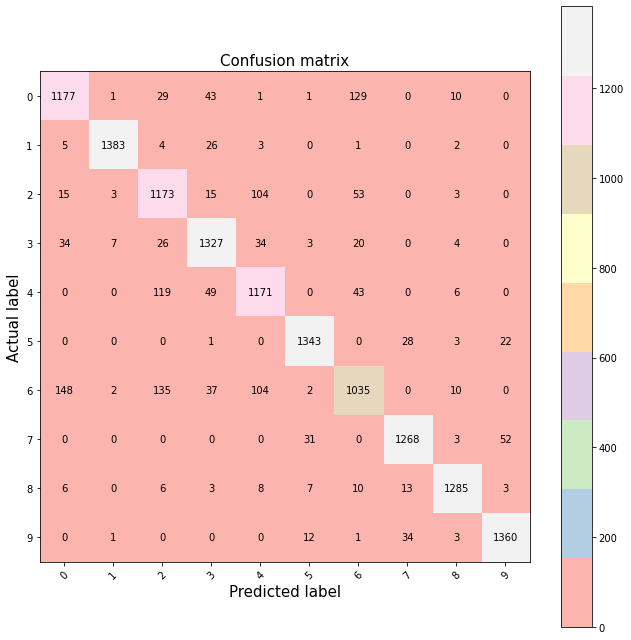

In [0]:
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in range(width):    
  for y in range(height):
    plt.annotate(str(cm[x][y]), xy=(y, x), 
    horizontalalignment='center',
    verticalalignment='center')

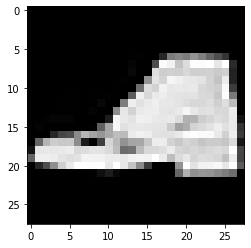

In [0]:
#the first image in the test set
plt.imshow(x_test[0].reshape(28,28), cmap='gray')

In [0]:
y_test_pred[0] # has 10 element

array([6.7188678e-11, 5.6676903e-12, 1.5325540e-12, 2.4012430e-12,
       3.7705894e-11, 1.0684977e-09, 3.6946544e-12, 2.9654440e-05,
       1.1590870e-09, 9.9997032e-01], dtype=float32)

In [0]:
np.argmax(y_test_pred[0]) # take our maximize one

9

In [0]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [0]:
np.argmax(y_test[0])

9